# Question 1

## All the imports fromt the crowdsignal_ch5.py

In [1]:
import sys
sys.path.append('./CoursePythonCode')

from util.VisualizeDataset import VisualizeDataset
from Chapter5.DistanceMetrics import InstanceDistanceMetrics
from Chapter5.DistanceMetrics import PersonDistanceMetricsNoOrdering
from Chapter5.DistanceMetrics import PersonDistanceMetricsOrdering
from Chapter5.Clustering import NonHierarchicalClustering
from Chapter5.Clustering import HierarchicalClustering
import copy
import pandas as pd
import matplotlib.pyplot as plot
import util.util as util
clusteringNH = NonHierarchicalClustering()
clusteringH = HierarchicalClustering()

%matplotlib inline

## Initializing classes and creating variables for the data

In [2]:
# initialize relevant class instances
DataViz = VisualizeDataset()
clusteringNH = NonHierarchicalClustering()

# reading in the data
data = pd.read_csv('./CoursePythonCode/intermediate_datafiles/chapter4_result.csv', index_col=0)
data.index = pd.to_datetime(data.index)

## Setting some shit up for the k-medoids method

In [ ]:
k_values = range(2, 10)
silhouette_values = []

## This part will show the best value for k. Book has it at 6 so it might be that but idk, better to run it right away

In [ ]:
for k in k_values:
    print 'k = ', k
    dataset_cluster = clusteringNH.k_medoids_over_instances(copy.deepcopy(data), ['gyr_phone_x', 'gyr_phone_y', 'gyr_phone_z'], k, 'default', 20, n_inits=10)
    silhouette_score = dataset_cluster['silhouette'].mean()
    print 'silhouette = ', silhouette_score
    silhouette_values.append(silhouette_score)

plot.plot(k_values, silhouette_values, 'b-')
plot.ylim([0,1])
plot.xlabel('k')
plot.ylabel('silhouette score')
plot.show()

## Set the k value appropriately based on the previous result

In [ ]:
k = 7

## This is the actual thing that we need to put as a end result

In [ ]:
dataset_kmed = clusteringNH.k_medoids_over_instances(copy.deepcopy(data), ['gyr_phone_x', 'gyr_phone_y', 'gyr_phone_z'], k, 'default', 20, n_inits=50)
DataViz.plot_clusters_3d(dataset_kmed, ['gyr_phone_x', 'gyr_phone_y', 'gyr_phone_z'], 'cluster', ['label'])
DataViz.plot_silhouette(dataset_kmed, 'cluster', 'silhouette')
util.print_latex_statistics_clusters(dataset_kmed, 'cluster', ['gyr_phone_x', 'gyr_phone_y', 'gyr_phone_z'], 'label')

# Question 2

In [ ]:
data2 = pd.read_csv('./CoursePythonCode/intermediate_datafiles/chapter2_our.csv', index_col=0)
data2.index = pd.to_datetime(data2.index)

In [ ]:
k_values = range(2, 10)
silhouette_values = []

In [ ]:
for k in k_values:
    print 'k = ', k
    dataset_cluster = clusteringNH.k_medoids_over_instances(copy.deepcopy(data2), ['acc_phone_x', 'acc_phone_y', 'acc_phone_z'], k, 'default', 20, n_inits=10)
    silhouette_score = dataset_cluster['silhouette'].mean()
    print 'silhouette = ', silhouette_score
    silhouette_values.append(silhouette_score)

plot.plot(k_values, silhouette_values, 'b-')
plot.ylim([0,1])
plot.xlabel('k')
plot.ylabel('silhouette score')
plot.show()

In [ ]:
k = 2

In [ ]:
dataset_kmed = clusteringNH.k_medoids_over_instances(copy.deepcopy(data), ['gyr_phone_x', 'gyr_phone_y', 'gyr_phone_z'], k, 'default', 20, n_inits=50)
DataViz.plot_clusters_3d(dataset_kmed, ['gyr_phone_x', 'gyr_phone_y', 'gyr_phone_z'], 'cluster', ['label'])
DataViz.plot_silhouette(dataset_kmed, 'cluster', 'silhouette')
util.print_latex_statistics_clusters(dataset_kmed, 'cluster', ['gyr_phone_x', 'gyr_phone_y', 'gyr_phone_z'], 'label')

In [6]:
from util.VisualizeDataset import VisualizeDataset
from Chapter7.PrepareDatasetForLearning import PrepareDatasetForLearning
from Chapter7.LearningAlgorithms import ClassificationAlgorithms
from Chapter7.LearningAlgorithms import RegressionAlgorithms
from Chapter7.Evaluation import ClassificationEvaluation
from Chapter7.Evaluation import RegressionEvaluation
from Chapter7.FeatureSelection import FeatureSelectionClassification
from Chapter7.FeatureSelection import FeatureSelectionRegression
import copy
import pandas as pd
from util import util
import matplotlib.pyplot as plot
import numpy as np
from sklearn.model_selection import train_test_split
import os

/opt/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [ ]:
dataset = pd.read_csv('./CoursePythonCode/intermediate_datafiles/chapter2_our.csv', index_col=0)
dataset.index = pd.to_datetime(dataset.index)

In [ ]:
from Chapter3.ImputationMissingValues import ImputationMissingValues
MisVal = ImputationMissingValues()
for col in [c for c in dataset.columns if not 'label' in c]:
    dataset = MisVal.impute_interpolate(dataset, col)
# imputed_interpolation_dataset = MisVal.impute_interpolate(copy.deepcopy(dataset), 'light_phone_lux')

In [ ]:
from Chapter3.DataTransformation import PrincipalComponentAnalysis

PCA = PrincipalComponentAnalysis()
selected_predictor_cols = [c for c in dataset.columns if (not ('label' in c)) and (not (c == 'hr_watch_rate'))]
pc_values = PCA.determine_pc_explained_variance(dataset, selected_predictor_cols)

In [ ]:
# Plot the variance explained.

plot.plot(range(1, len(selected_predictor_cols)+1), pc_values, 'b-')
plot.xlabel('principal component number')
plot.ylabel('explained variance')
plot.show(block=False)


In [ ]:
# We select 7 as the best number of PC's as this explains most of the variance

n_pcs = 2

dataset = PCA.apply_pca(copy.deepcopy(dataset), selected_predictor_cols, n_pcs)

#And we visualize the result of the PC's

DataViz.plot_dataset(dataset, ['pca_', 'label'], ['like', 'like'], ['line', 'points'])

# And the overall final dataset:

#DataViz.plot_dataset(dataset, ['acc_', 'gyr_', 'light_phone_lux', 'mag_', 'pca_', 'label'], ['like', 'like', 'like', 'like', 'like', 'like'], ['line', 'line', 'line', 'line', 'line', 'line', 'line', 'points', 'points'])

# Store the outcome.

dataset.to_csv('chapter3_result_our.csv')

In [ ]:
from util.VisualizeDataset import VisualizeDataset
from Chapter4.TemporalAbstraction import NumericalAbstraction
from Chapter4.TemporalAbstraction import CategoricalAbstraction
from Chapter4.FrequencyAbstraction import FourierTransformation
from Chapter4.TextAbstraction import TextAbstraction
import copy
import pandas as pd



# Compute the number of milliseconds covered by an instane based on the first two rows
milliseconds_per_instance = (dataset.index[1] - dataset.index[0]).microseconds/1000


# Chapter 4: Identifying aggregate attributes.

# First we focus on the time domain.

# Set the window sizes to the number of instances representing 5 seconds, 30 seconds and 5 minutes
window_sizes = [int(float(5000)/milliseconds_per_instance), int(float(0.5*60000)/milliseconds_per_instance), int(float(5*60000)/milliseconds_per_instance)]

NumAbs = NumericalAbstraction()
dataset_copy = copy.deepcopy(dataset)
for ws in window_sizes:
    dataset_copy = NumAbs.abstract_numerical(dataset_copy, ['acc_phone_x'], ws, 'mean')
    dataset_copy = NumAbs.abstract_numerical(dataset_copy, ['acc_phone_x'], ws, 'std')

#DataViz.plot_dataset(dataset_copy, ['acc_phone_x', 'acc_phone_x_temp_mean', 'acc_phone_x_temp_std', 'label'], ['exact', 'like', 'like', 'like'], ['line', 'line', 'line', 'points'])

ws = int(float(0.5*60000)/milliseconds_per_instance)
selected_predictor_cols = [c for c in dataset.columns if not 'label' in c]
dataset = NumAbs.abstract_numerical(dataset, selected_predictor_cols, ws, 'mean')
dataset = NumAbs.abstract_numerical(dataset, selected_predictor_cols, ws, 'std')


CatAbs = CategoricalAbstraction()
dataset = CatAbs.abstract_categorical(dataset, ['label'], ['like'], 0.03, int(float(5*60000)/milliseconds_per_instance), 2)

# Now we move to the frequency domain, with the same window size.

FreqAbs = FourierTransformation()
fs = float(1000)/milliseconds_per_instance

periodic_predictor_cols = ['acc_phone_x','acc_phone_y','acc_phone_z','gyr_phone_x','gyr_phone_y',
                           'gyr_phone_z','mag_phone_x','mag_phone_y','mag_phone_z',
                           ]
data_table = FreqAbs.abstract_frequency(copy.deepcopy(dataset), ['acc_phone_x'], int(float(10000)/milliseconds_per_instance), fs)

# Spectral analysis.

#DataViz.plot_dataset(data_table, ['acc_phone_x_max_freq', 'acc_phone_x_freq_weighted', 'acc_phone_x_pse', 'label'], ['like', 'like', 'like', 'like'], ['line', 'line', 'line','points'])

dataset = FreqAbs.abstract_frequency(dataset, periodic_predictor_cols, int(float(10000)/milliseconds_per_instance), fs)

# Now we only take a certain percentage of overlap in the windows, otherwise our training examples will be too much alike.

# The percentage of overlap we allow
window_overlap = 0.9
skip_points = int((1-window_overlap) * ws)
dataset = dataset.iloc[::skip_points,:]


dataset.to_csv('chapter4_result_our.csv')

#DataViz.plot_dataset(dataset, ['acc_phone_x', 'gyr_phone_x', 'hr_watch_rate', 'light_phone_lux', 'mag_phone_x', 'press_phone_', 'pca_1', 'label'], ['like', 'like', 'like', 'like', 'like', 'like', 'like','like'], ['line', 'line', 'line', 'line', 'line', 'line', 'line', 'points'])


In [ ]:
dataset.to_csv('chapter4_result_our.csv')

In [3]:
dataset = pd.read_csv('./CoursePythonCode/intermediate_datafiles/chapter4_result_our.csv', index_col=0)
dataset.index = pd.to_datetime(dataset.index)

In [ ]:
from util.VisualizeDataset import VisualizeDataset
from Chapter5.DistanceMetrics import InstanceDistanceMetrics
from Chapter5.DistanceMetrics import PersonDistanceMetricsNoOrdering
from Chapter5.DistanceMetrics import PersonDistanceMetricsOrdering
from Chapter5.Clustering import NonHierarchicalClustering
from Chapter5.Clustering import HierarchicalClustering
import copy
import pandas as pd
import matplotlib.pyplot as plot
import util.util as util

DataViz = VisualizeDataset()


clusteringNH = NonHierarchicalClustering()

# Let us look at k-means first.

k_values = range(2, 10)
silhouette_values = []
#
## Do some initial runs to determine the right number for k
#
print '===== kmeans clustering ====='
for k in k_values:
    print 'k = ', k
    dataset_cluster = clusteringNH.k_means_over_instances(copy.deepcopy(dataset), ['acc_phone_x', 'acc_phone_y', 'acc_phone_z'], k, 'default', 20, 10)
    silhouette_score = dataset_cluster['silhouette'].mean()
    print 'silhouette = ', silhouette_score
    silhouette_values.append(silhouette_score)

plot.plot(k_values, silhouette_values, 'b-')
plot.xlabel('k')
plot.ylabel('silhouette score')
plot.ylim([0,1])
plot.show()


In [ ]:
k = 2

dataset_knn = clusteringNH.k_means_over_instances(copy.deepcopy(dataset), ['acc_phone_x', 'acc_phone_y', 'acc_phone_z'], k, 'default', 50, 50)
DataViz.plot_clusters_3d(dataset_knn, ['acc_phone_x', 'acc_phone_y', 'acc_phone_z'], 'cluster', ['label'])
DataViz.plot_silhouette(dataset_knn, 'cluster', 'silhouette')
util.print_latex_statistics_clusters(dataset_knn, 'cluster', ['acc_phone_x', 'acc_phone_y', 'acc_phone_z'], 'label')
del dataset_knn['silhouette']

In [ ]:
k_values = range(2, 10)
silhouette_values = []

# Do some initial runs to determine the right number for k

print '===== k medoids clustering ====='
for k in k_values:
    print 'k = ', k
    dataset_cluster = clusteringNH.k_medoids_over_instances(copy.deepcopy(dataset), ['acc_phone_x', 'acc_phone_y', 'acc_phone_z'], k, 'default', 20, n_inits=10)
    silhouette_score = dataset_cluster['silhouette'].mean()
    print 'silhouette = ', silhouette_score
    silhouette_values.append(silhouette_score)

plot.plot(k_values, silhouette_values, 'b-')
plot.ylim([0,1])
plot.xlabel('k')
plot.ylabel('silhouette score')
plot.show()


In [ ]:
# And run k medoids with the highest silhouette score

k = 2

dataset_kmed = clusteringNH.k_medoids_over_instances(copy.deepcopy(dataset), ['acc_phone_x', 'acc_phone_y', 'acc_phone_z'], k, 'default', 20, n_inits=50)
DataViz.plot_clusters_3d(dataset_kmed, ['acc_phone_x', 'acc_phone_y', 'acc_phone_z'], 'cluster', ['label'])
DataViz.plot_silhouette(dataset_kmed, 'cluster', 'silhouette')
util.print_latex_statistics_clusters(dataset_kmed, 'cluster', ['acc_phone_x', 'acc_phone_y', 'acc_phone_z'], 'label')



In [ ]:
# And the hierarchical clustering is the last one we try

clusteringH = HierarchicalClustering()

k_values = range(2, 10)
silhouette_values = []

# Do some initial runs to determine the right number for the maximum number of clusters.

print '===== agglomaritive clustering ====='
for k in k_values:
    print 'k = ', k
    dataset_cluster, l = clusteringH.agglomerative_over_instances(copy.deepcopy(dataset), ['acc_phone_x', 'acc_phone_y', 'acc_phone_z'], 5, 'euclidean', use_prev_linkage=True, link_function='ward')
    silhouette_score = dataset_cluster['silhouette'].mean()
    print 'silhouette = ', silhouette_score
    silhouette_values.append(silhouette_score)
    if k == k_values[0]:
        DataViz.plot_dendrogram(dataset_cluster, l)

plot.plot(k_values, silhouette_values, 'b-')
plot.ylim([0,1])
plot.xlabel('max number of clusters')
plot.ylabel('silhouette score')
plot.show()

# And we select the outcome dataset of the knn clustering....

dataset_knn.to_csv('chapter5_result_our.csv')

In [4]:
dataset = pd.read_csv('./CoursePythonCode/intermediate_datafiles/chapter5_result_our.csv', index_col=0)
dataset.index = pd.to_datetime(dataset.index)

In [7]:
prepare = PrepareDatasetForLearning()

train_X, test_X, train_y, test_y = prepare.split_single_dataset_classification(dataset, ['label'], 'like', 0.7, filter=True, temporal=False)
#train_X, test_X, train_y, test_y = prepare.split_single_dataset_classification(dataset, ['label'], 'like', 0.01, filter=True, temporal=False)

print 'Training set length is: ', len(train_X.index)
print 'Test set length is: ', len(test_X.index)

# Select subsets of the features that we will consider:

basic_features = ['acc_phone_x','acc_phone_y','acc_phone_z','gyr_phone_x','gyr_phone_y','gyr_phone_z',
                  'light_phone_lux','mag_phone_x','mag_phone_y','mag_phone_z']
pca_features = ['pca_1','pca_2']
time_features = [name for name in dataset.columns if '_temp_' in name]
freq_features = [name for name in dataset.columns if (('_freq' in name) or ('_pse' in name))]
print '#basic features: ', len(basic_features)
print '#PCA features: ', len(pca_features)
print '#time features: ', len(time_features)
print '#frequency features: ', len(freq_features)
cluster_features = ['cluster']
print '#cluster features: ', len(cluster_features)
features_after_chapter_3 = list(set().union(basic_features, pca_features))
features_after_chapter_4 = list(set().union(basic_features, pca_features, time_features, freq_features))
features_after_chapter_5 = list(set().union(basic_features, pca_features, time_features, freq_features, cluster_features))




Training set length is:  192
Test set length is:  83
#basic features:  10
#PCA features:  2
#time features:  24
#frequency features:  126
#cluster features:  1


0


/opt/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
[0.9010416666666666, 0.9791666666666666, 0.9895833333333334, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
['acc_phone_x_temp_mean_ws_60', 'acc_phone_z', 'gyr_phone_z_temp_mean_ws_60', 'mag_phone_x_freq_0.9_Hz_ws_20', 'acc_phone_y_freq_0.2_Hz_ws_20', 'gyr_phone_x_freq_0.30000000000000004_Hz_ws_20', 'gyr_phone_z_freq_0.9_Hz_ws_20', 'gyr_phone_y_freq_0.7000000000000001_Hz_ws_20', 'gyr_phone_x_freq_0.6000000000000001_Hz_ws_20', 'acc_phone_z_freq_0.8_Hz_ws_20', 'gyr_phone_y_max_freq', 'mag_phone_y_freq_0.7000000000000001_Hz_ws_20', 'mag_phone_y_freq_0.6000000000000001_Hz_ws_20', 'acc_phone_y_freq_weighted', 'gyr_phone_x_max_freq', 'gyr_phone_x_freq_1.0_Hz_ws_20', 'acc_

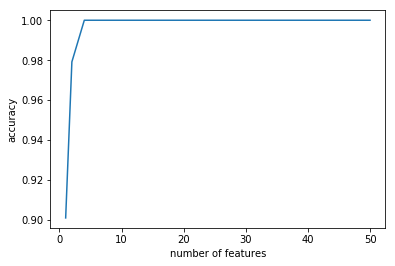

In [8]:
# First, let us consider the performance over a selection of features:
fs = FeatureSelectionClassification()

features, ordered_features, ordered_scores = fs.forward_selection(50, train_X[features_after_chapter_5], train_y)
print ordered_scores
print ordered_features

plot.plot(range(1, 51), ordered_scores)
plot.xlabel('number of features')
plot.ylabel('accuracy')
plot.show()

/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
/opt/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:910: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/opt/anaconda2/lib/python2.7/site-packages/matplotlib/rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)
/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.


[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.8536144578313254, 0.8481927710843372, 0.85, 0.843975903614458, 0.844578313253012, 0.8656626506024097]


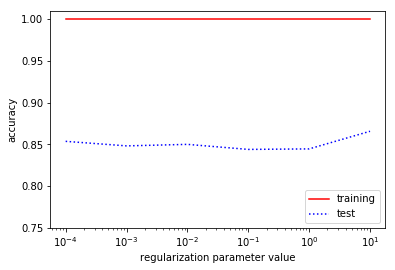

In [9]:
# Based on the plot we select the top 10 features.

selected_features = ['acc_phone_x_temp_mean_ws_60', 'acc_phone_z', 'gyr_phone_z_temp_mean_ws_60', 
                     'mag_phone_x_freq_0.9_Hz_ws_20', 'acc_phone_y_freq_0.2_Hz_ws_20', 'gyr_phone_x_freq_0.30000000000000004_Hz_ws_20', 
                     'gyr_phone_z_freq_0.9_Hz_ws_20', 'gyr_phone_y_freq_0.7000000000000001_Hz_ws_20',
                     'gyr_phone_x_freq_0.6000000000000001_Hz_ws_20', 'acc_phone_z_freq_0.8_Hz_ws_20',
                     ]
# Let us first study the impact of regularization and model complexity: does regularization prevent overfitting?

learner = ClassificationAlgorithms()
eval = ClassificationEvaluation()

reg_parameters = [0.0001, 0.001, 0.01, 0.1, 1, 10]
performance_training = []
performance_test = []

# We repeat the experiment a number of times to get a bit more robust data as the initialization of the NN is random.

repeats = 20

for reg_param in reg_parameters:
    performance_tr = 0
    performance_te = 0
    for i in range(0, repeats):
        class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.feedforward_neural_network(train_X, train_y,
                                                                                                            test_X, hidden_layer_sizes=(250, ), alpha=reg_param, max_iter=500,
                                                                                                            gridsearch=False)
        performance_tr += eval.accuracy(train_y, class_train_y)
        performance_te += eval.accuracy(test_y, class_test_y)
    performance_training.append(performance_tr/repeats)
    performance_test.append(performance_te/repeats)

plot.hold(True)
plot.semilogx(reg_parameters, performance_training, 'r-')
plot.semilogx(reg_parameters, performance_test, 'b:')
print performance_training
print performance_test
plot.xlabel('regularization parameter value')
plot.ylabel('accuracy')
plot.ylim([0.75, 1.01])
plot.legend(['training', 'test'], loc=4)
plot.hold(False)

plot.show()

/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  del sys.path[0]
/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.


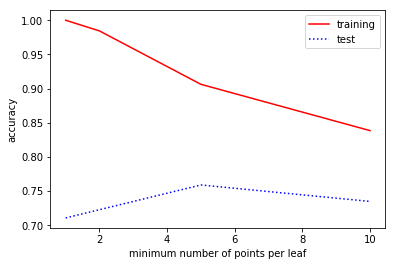

In [10]:
# Second, let us consider the influence of certain parameter settings (very related to the regulariztion) and study the impact on performance.

leaf_settings = [1,2,5,10]
performance_training = []
performance_test = []

for no_points_leaf in leaf_settings:
    class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.decision_tree(train_X[selected_features], train_y, test_X[selected_features], min_samples_leaf=no_points_leaf,
                                                                                               gridsearch=False, print_model_details=False)
    performance_training.append(eval.accuracy(train_y, class_train_y))
    performance_test.append(eval.accuracy(test_y, class_test_y))

plot.hold(True)
plot.plot(leaf_settings, performance_training, 'r-')
plot.plot(leaf_settings, performance_test, 'b:')
plot.xlabel('minimum number of points per leaf')
plot.ylabel('accuracy')
plot.legend(['training', 'test'], loc=1)
plot.hold(False)

plot.show()



In [14]:
from util.VisualizeDataset import VisualizeDataset
from Chapter7.PrepareDatasetForLearning import PrepareDatasetForLearning
from Chapter7.LearningAlgorithms import ClassificationAlgorithms
from Chapter7.LearningAlgorithms import RegressionAlgorithms
from Chapter7.Evaluation import ClassificationEvaluation
from Chapter7.Evaluation import RegressionEvaluation
from Chapter7.FeatureSelection import FeatureSelectionClassification
from Chapter7.FeatureSelection import FeatureSelectionRegression
import copy
import pandas as pd
from util import util
import matplotlib.pyplot as plot
import numpy as np
from sklearn.model_selection import train_test_split
import os
export_tree_path = './CoursePythonCode/intermediate_datafiles/'

initial set  &  0.9833 \emph{( 0.9649 - 1.0018 )}  &  0.8892 \emph{( 0.8202 - 0.9581 )}  &  0.9833 \emph{( 0.9649 - 1.0018 )}  &  0.8988 \emph{( 0.8326 - 0.9650 )}  &  0.9062 \emph{( 0.8642 - 0.9483 )}  &  0.7711 \emph{( 0.6789 - 0.8633 )}  &  1.0000 \emph{( 1.0000 - 1.0000 )}  &  0.6265 \emph{( 0.5203 - 0.7327 )}  &  0.9740 \emph{( 0.9510 - 0.9969 )}  &  0.8554 \emph{( 0.7782 - 0.9326 )}  &  0.8750 \emph{( 0.8273 - 0.9227 )}  &  0.8795 \emph{( 0.8081 - 0.9510 )} \\\hline
Chapter 3  &  0.9802 \emph{( 0.9601 - 1.0003 )}  &  0.8892 \emph{( 0.8202 - 0.9581 )}  &  0.9760 \emph{( 0.9540 - 0.9981 )}  &  0.9108 \emph{( 0.8483 - 0.9734 )}  &  0.9271 \emph{( 0.8896 - 0.9646 )}  &  0.8072 \emph{( 0.7206 - 0.8938 )}  &  1.0000 \emph{( 1.0000 - 1.0000 )}  &  0.6265 \emph{( 0.5203 - 0.7327 )}  &  0.9740 \emph{( 0.9510 - 0.9969 )}  &  0.8072 \emph{( 0.7206 - 0.8938 )}  &  0.8750 \emph{( 0.8273 - 0.9227 )}  &  0.8916 \emph{( 0.8233 - 0.9598 )} \\\hline
Chapter 4  &  0.9969 \emph{( 0.9888 - 1.0049 )} 

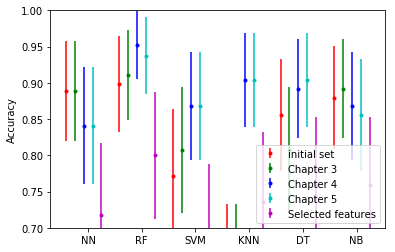

{'criterion': 'entropy', 'min_samples_leaf': 2}
Feature importance decision tree:
acc_phone_z  &  0.4146095719711412
acc_phone_x_temp_mean_ws_60  &  0.3383443595635872
gyr_phone_z_temp_mean_ws_60  &  0.1252357793970616
mag_phone_x_freq_0.9_Hz_ws_20  &  0.09753533813053127
gyr_phone_x_freq_0.30000000000000004_Hz_ws_20  &  0.024274950937678754
acc_phone_y_freq_0.2_Hz_ws_20  &  0.0
gyr_phone_z_freq_0.9_Hz_ws_20  &  0.0
gyr_phone_y_freq_0.7000000000000001_Hz_ws_20  &  0.0
gyr_phone_x_freq_0.6000000000000001_Hz_ws_20  &  0.0
acc_phone_z_freq_0.8_Hz_ws_20  &  0.0
{'n_estimators': 50, 'criterion': 'gini', 'min_samples_leaf': 2}
Feature importance random forest:
gyr_phone_z_temp_mean_ws_60  &  0.23925922451597814
acc_phone_z  &  0.23757198134703558
acc_phone_x_temp_mean_ws_60  &  0.22660564415789936
acc_phone_z_freq_0.8_Hz_ws_20  &  0.07629948527448974
mag_phone_x_freq_0.9_Hz_ws_20  &  0.054640009467184655
gyr_phone_z_freq_0.9_Hz_ws_20  &  0.04737379008222977
acc_phone_y_freq_0.2_Hz_ws_20  &  

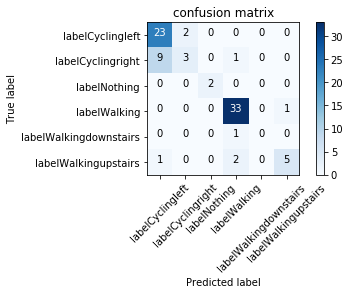

In [15]:

# So yes, it is important :) Therefore we perform grid searches over the most important parameters, and do so by means
# of cross validation upon the training set.


possible_feature_sets = [basic_features, features_after_chapter_3, features_after_chapter_4, features_after_chapter_5, selected_features]
feature_names = ['initial set', 'Chapter 3', 'Chapter 4', 'Chapter 5', 'Selected features']
repeats = 5

scores_over_all_algs = []

for i in range(0, len(possible_feature_sets)):
    selected_train_X = train_X[possible_feature_sets[i]]
    selected_test_X = test_X[possible_feature_sets[i]]

    # First we run our non deterministic classifiers a number of times to average their score.

    performance_tr_nn = 0
    performance_tr_rf = 0
    performance_tr_svm = 0
    performance_te_nn = 0
    performance_te_rf = 0
    performance_te_svm = 0

    for repeat in range(0, repeats):
        class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.feedforward_neural_network(selected_train_X, train_y, selected_test_X, gridsearch=True)
        performance_tr_nn += eval.accuracy(train_y, class_train_y)
        performance_te_nn += eval.accuracy(test_y, class_test_y)

        class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.random_forest(selected_train_X, train_y, selected_test_X, gridsearch=True)
        performance_tr_rf += eval.accuracy(train_y, class_train_y)
        performance_te_rf += eval.accuracy(test_y, class_test_y)

        class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.support_vector_machine_with_kernel(selected_train_X, train_y, selected_test_X, gridsearch=True)
        performance_tr_svm += eval.accuracy(train_y, class_train_y)
        performance_te_svm += eval.accuracy(test_y, class_test_y)


    overall_performance_tr_nn = performance_tr_nn/repeats
    overall_performance_te_nn = performance_te_nn/repeats
    overall_performance_tr_rf = performance_tr_rf/repeats
    overall_performance_te_rf = performance_te_rf/repeats
    overall_performance_tr_svm = performance_tr_svm/repeats
    overall_performance_te_svm = performance_te_svm/repeats

    # And we run our deterministic classifiers:


    class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.k_nearest_neighbor(selected_train_X, train_y, selected_test_X, gridsearch=True)
    performance_tr_knn = eval.accuracy(train_y, class_train_y)
    performance_te_knn = eval.accuracy(test_y, class_test_y)

    class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.decision_tree(selected_train_X, train_y, selected_test_X, gridsearch=True)
    performance_tr_dt = eval.accuracy(train_y, class_train_y)
    performance_te_dt = eval.accuracy(test_y, class_test_y)

    class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.naive_bayes(selected_train_X, train_y, selected_test_X)
    performance_tr_nb = eval.accuracy(train_y, class_train_y)
    performance_te_nb = eval.accuracy(test_y, class_test_y)

    scores_with_sd = util.print_table_row_performances(feature_names[i], len(selected_train_X.index), len(selected_test_X.index), [
                                                                                                (overall_performance_tr_nn, overall_performance_te_nn),
                                                                                                (overall_performance_tr_rf, overall_performance_te_rf),
                                                                                                (overall_performance_tr_svm, overall_performance_te_svm),
                                                                                                (performance_tr_knn, performance_te_knn),
                                                                                                (performance_tr_dt, performance_te_dt),
                                                                                                (performance_tr_nb, performance_te_nb)])
    scores_over_all_algs.append(scores_with_sd)

DataViz.plot_performances_classification(['NN', 'RF', 'SVM', 'KNN', 'DT', 'NB'], feature_names, scores_over_all_algs)

# And we study two promising ones in more detail. First let us consider the decision tree which works best with the selected
# features.
#
class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.decision_tree(train_X[selected_features], train_y, test_X[selected_features],
                                                                                           gridsearch=True,
                                                                                           print_model_details=True, export_tree_path=export_tree_path)

class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.random_forest(train_X[selected_features], train_y, test_X[selected_features],
                                                                                           gridsearch=True, print_model_details=True)

test_cm = eval.confusion_matrix(test_y, class_test_y, class_train_prob_y.columns)

DataViz.plot_confusion_matrix(test_cm, class_train_prob_y.columns, normalize=False)

# Chapter 8 Question 2